## Engineering Graduate Salary Prediction

#### Objective : Our objective is to determine the salary of an engineering graduate in India.

In [2]:
import numpy as np
import pandas as pd
import re

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("C:\\Users\\lenovo\\Desktop\\DS\\internship\\11  data.xlsx - Sheet1.csv")

In [6]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [7]:
df.drop("Unnamed: 0",axis = 1 , inplace = True)

In [8]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [9]:
df.shape

(3998, 38)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3998 non-null   int64  
 1   Salary                 3998 non-null   float64
 2   DOJ                    3998 non-null   object 
 3   DOL                    3998 non-null   object 
 4   Designation            3998 non-null   object 
 5   JobCity                3998 non-null   object 
 6   Gender                 3998 non-null   object 
 7   DOB                    3998 non-null   object 
 8   10percentage           3998 non-null   float64
 9   10board                3998 non-null   object 
 10  12graduation           3998 non-null   int64  
 11  12percentage           3998 non-null   float64
 12  12board                3998 non-null   object 
 13  CollegeID              3998 non-null   int64  
 14  CollegeTier            3998 non-null   int64  
 15  Degr

In [11]:
df.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [12]:
# dropping features which do not make any sense to predict salary

In [13]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [14]:
df.drop(['ID', '10board','12graduation','12board' ,'CollegeID' , 'CollegeCityID','CollegeState'
                                     , 'CollegeCityTier'], axis = 1, inplace = True)

In [16]:
df.shape

(3998, 30)


### Data Cleaning

In [18]:
df.replace(-1, np.NaN,inplace=True)

In [19]:
df.isnull().sum()

Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
12percentage                0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
openess_to_experience       0
dtype: int64

In [22]:
# null values
missing_val_col = [col for col in df.columns if df.isnull().sum()[col] > 0]

In [24]:
def fill_miss_val(df,missing_val_col):
    data = df.copy()
    '''Filling missing values with mean'''
    for col in missing_val_col:
        data[col] = data[col].fillna(data[col].mean())
     
    return data

df = fill_miss_val(df,missing_val_col)

In [25]:
df.isnull().sum()

Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
12percentage             0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

In [27]:
num  = df.select_dtypes(include=['int64', 'float64']).columns
num

Index(['Salary', '10percentage', '12percentage', 'CollegeTier', 'collegeGPA',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

### Univariate Analysis

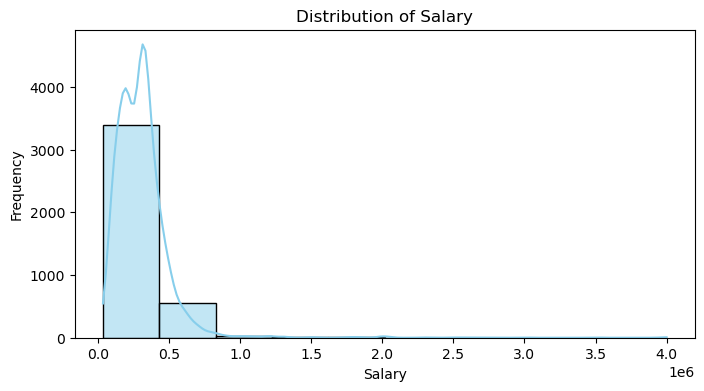

Descriptive Statistics for Salary:
count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64


In [33]:
plt.figure(figsize=(8, 4))

sns.histplot(df['Salary'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

print("Descriptive Statistics for Salary:")
print(df['Salary'].describe())

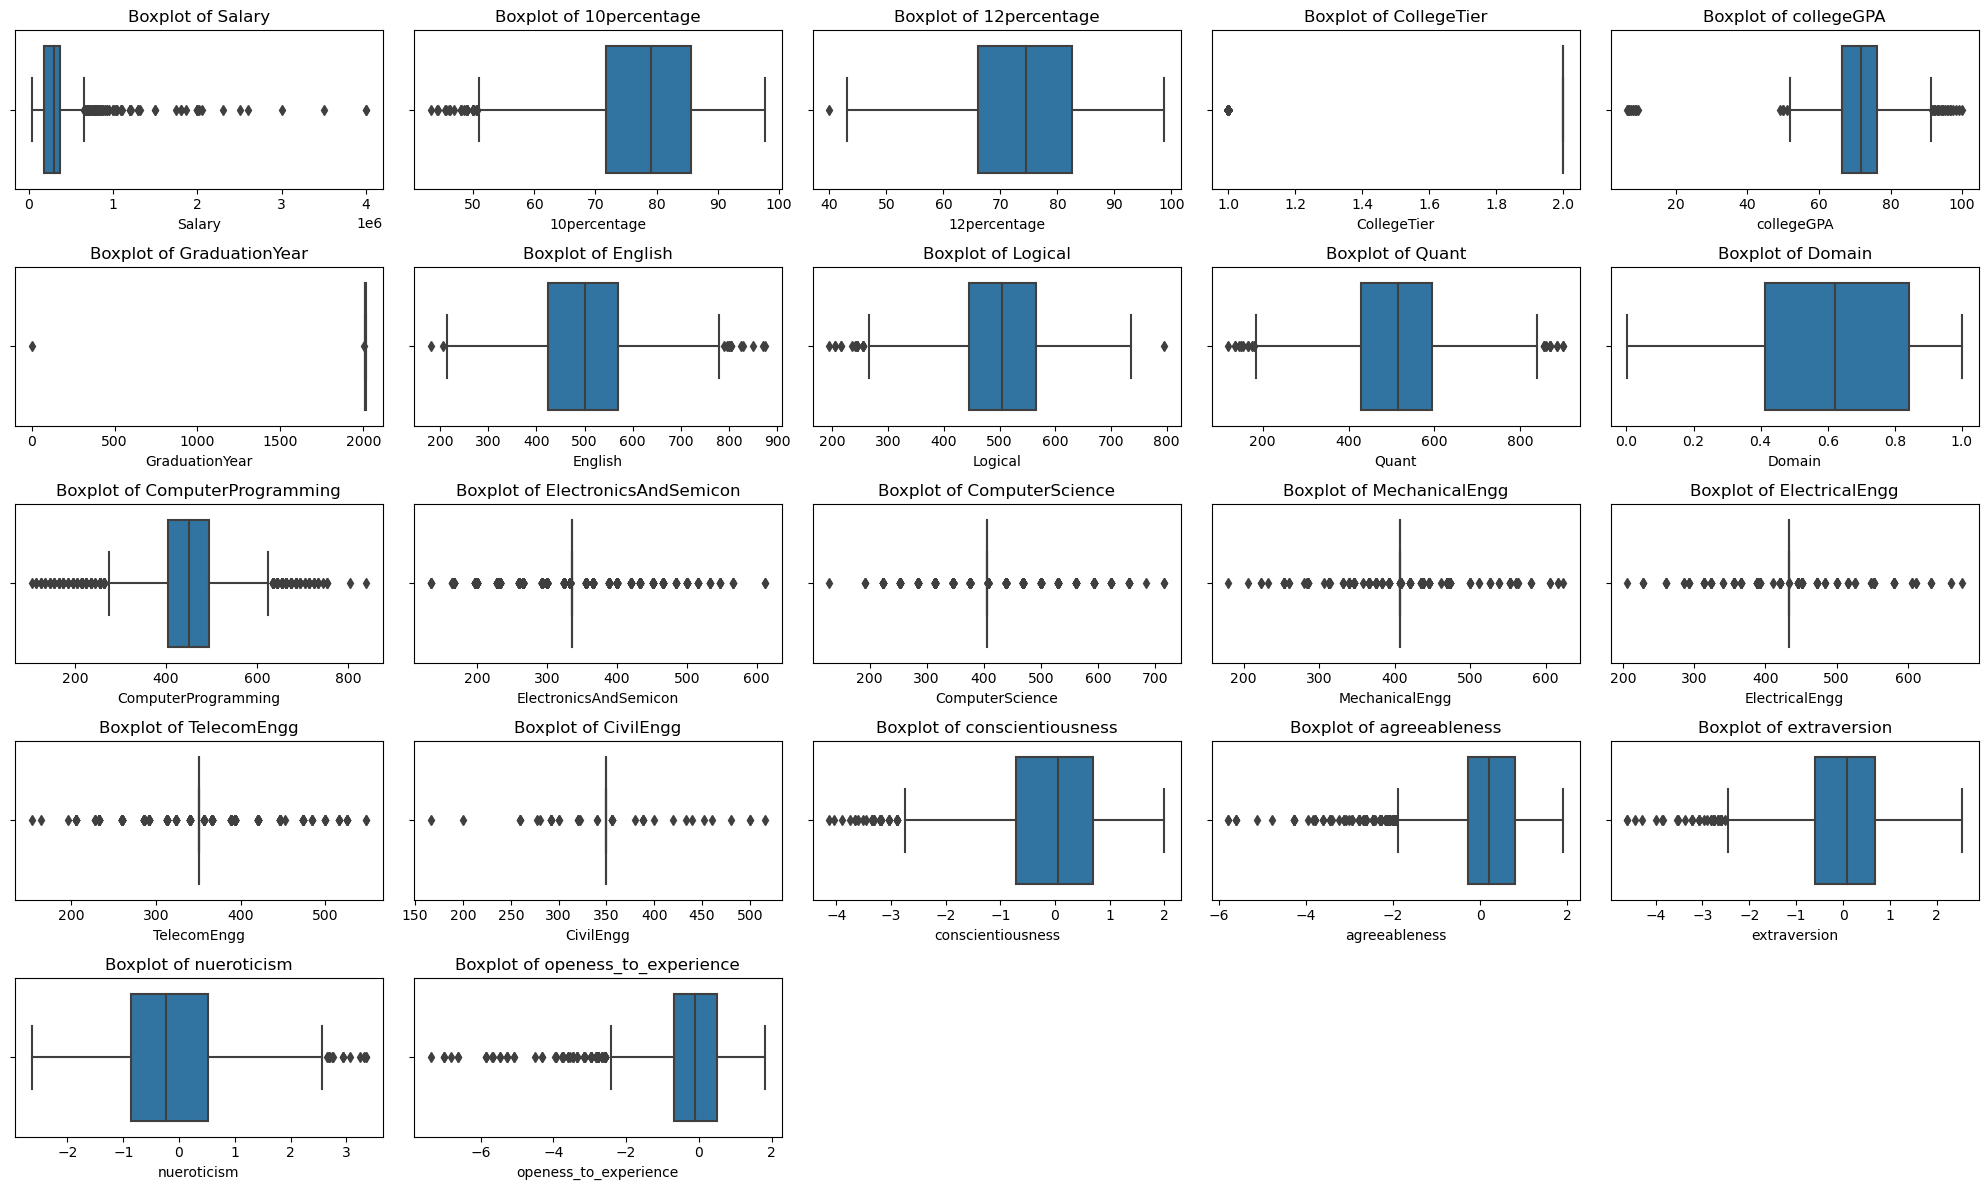

In [37]:
num_col = ['Salary', '10percentage', '12percentage', 'CollegeTier', 'collegeGPA',
                     'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
                     'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
                     'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
                     'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
                     'openess_to_experience']

plt.figure(figsize=(20, 12))
for i, column in enumerate(num_col, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

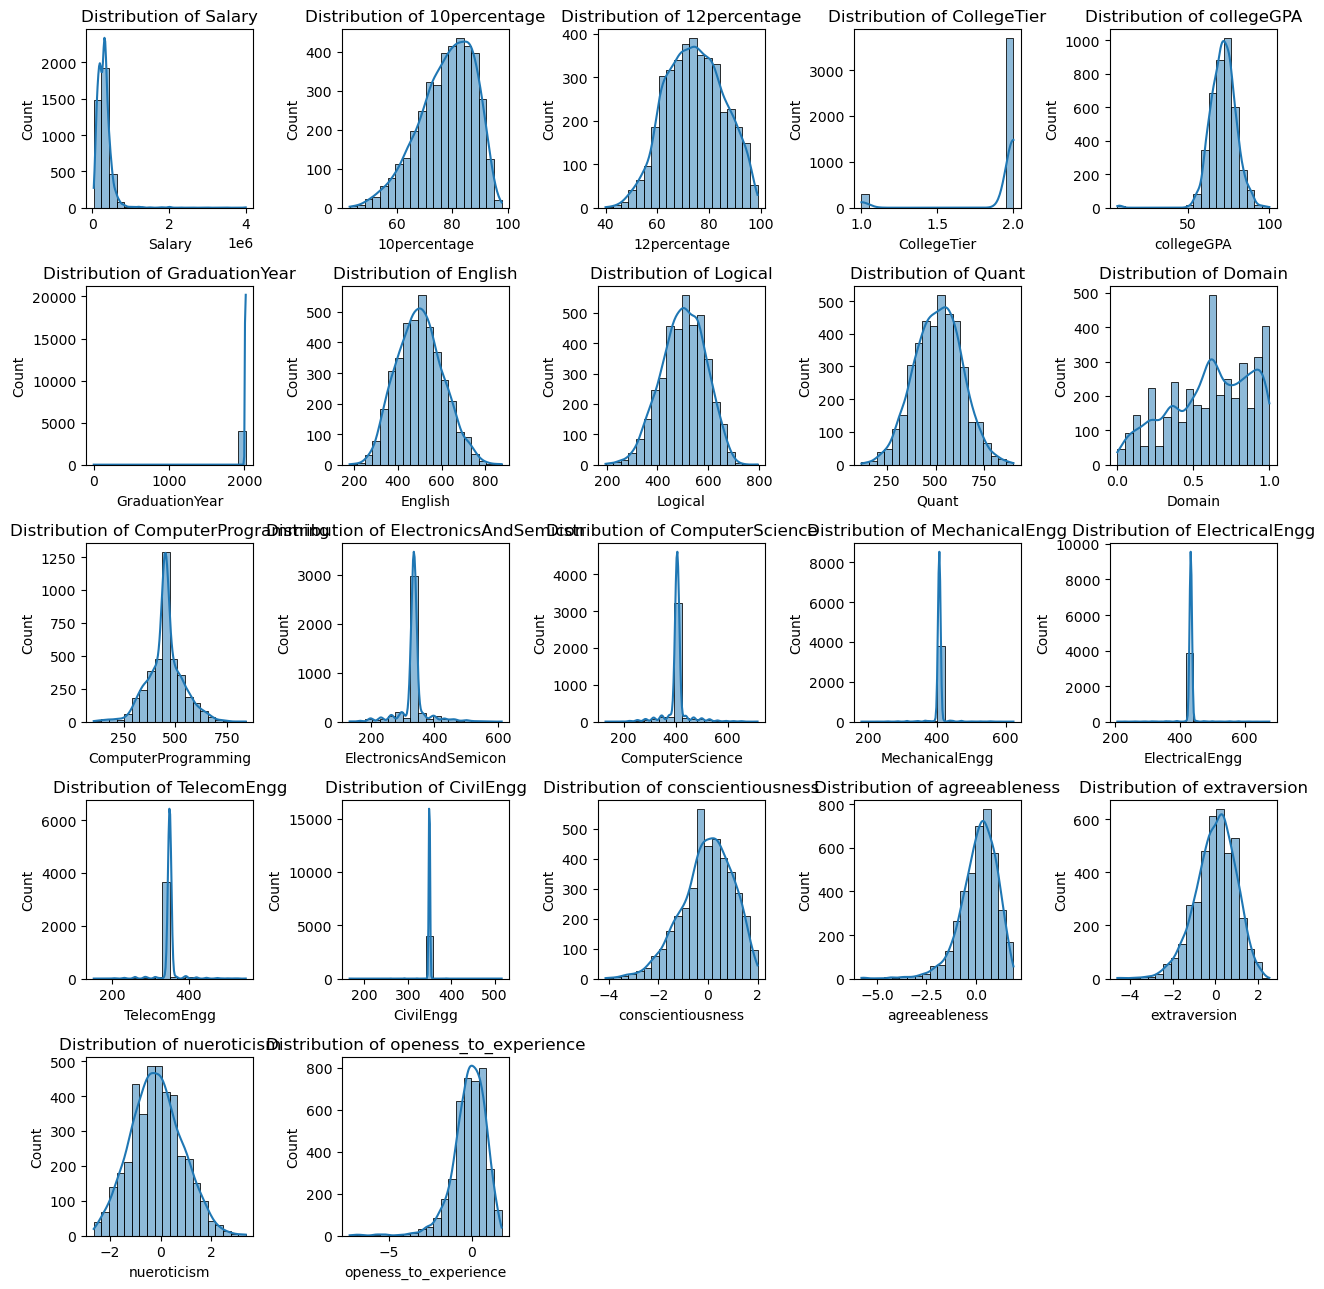

In [77]:
plt.figure(figsize=(13, 13))
for i, column in enumerate(num_col, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

In [40]:
cat_col = df.select_dtypes(include=['object']).columns.tolist()
cat_col

['DOJ',
 'DOL',
 'Designation',
 'JobCity',
 'Gender',
 'DOB',
 'Degree',
 'Specialization']

In [41]:
df['DOJ'] =pd.to_datetime(df['DOJ'], format='%m/%d/%y', errors='coerce')

In [42]:
df['DOB'] = df['DOB'].apply(lambda x: re.sub(r'\b0:00\b', '', x))

In [43]:
df['DOB'] =pd.to_datetime(df['DOB'], format='%m/%d/%y', errors='coerce')

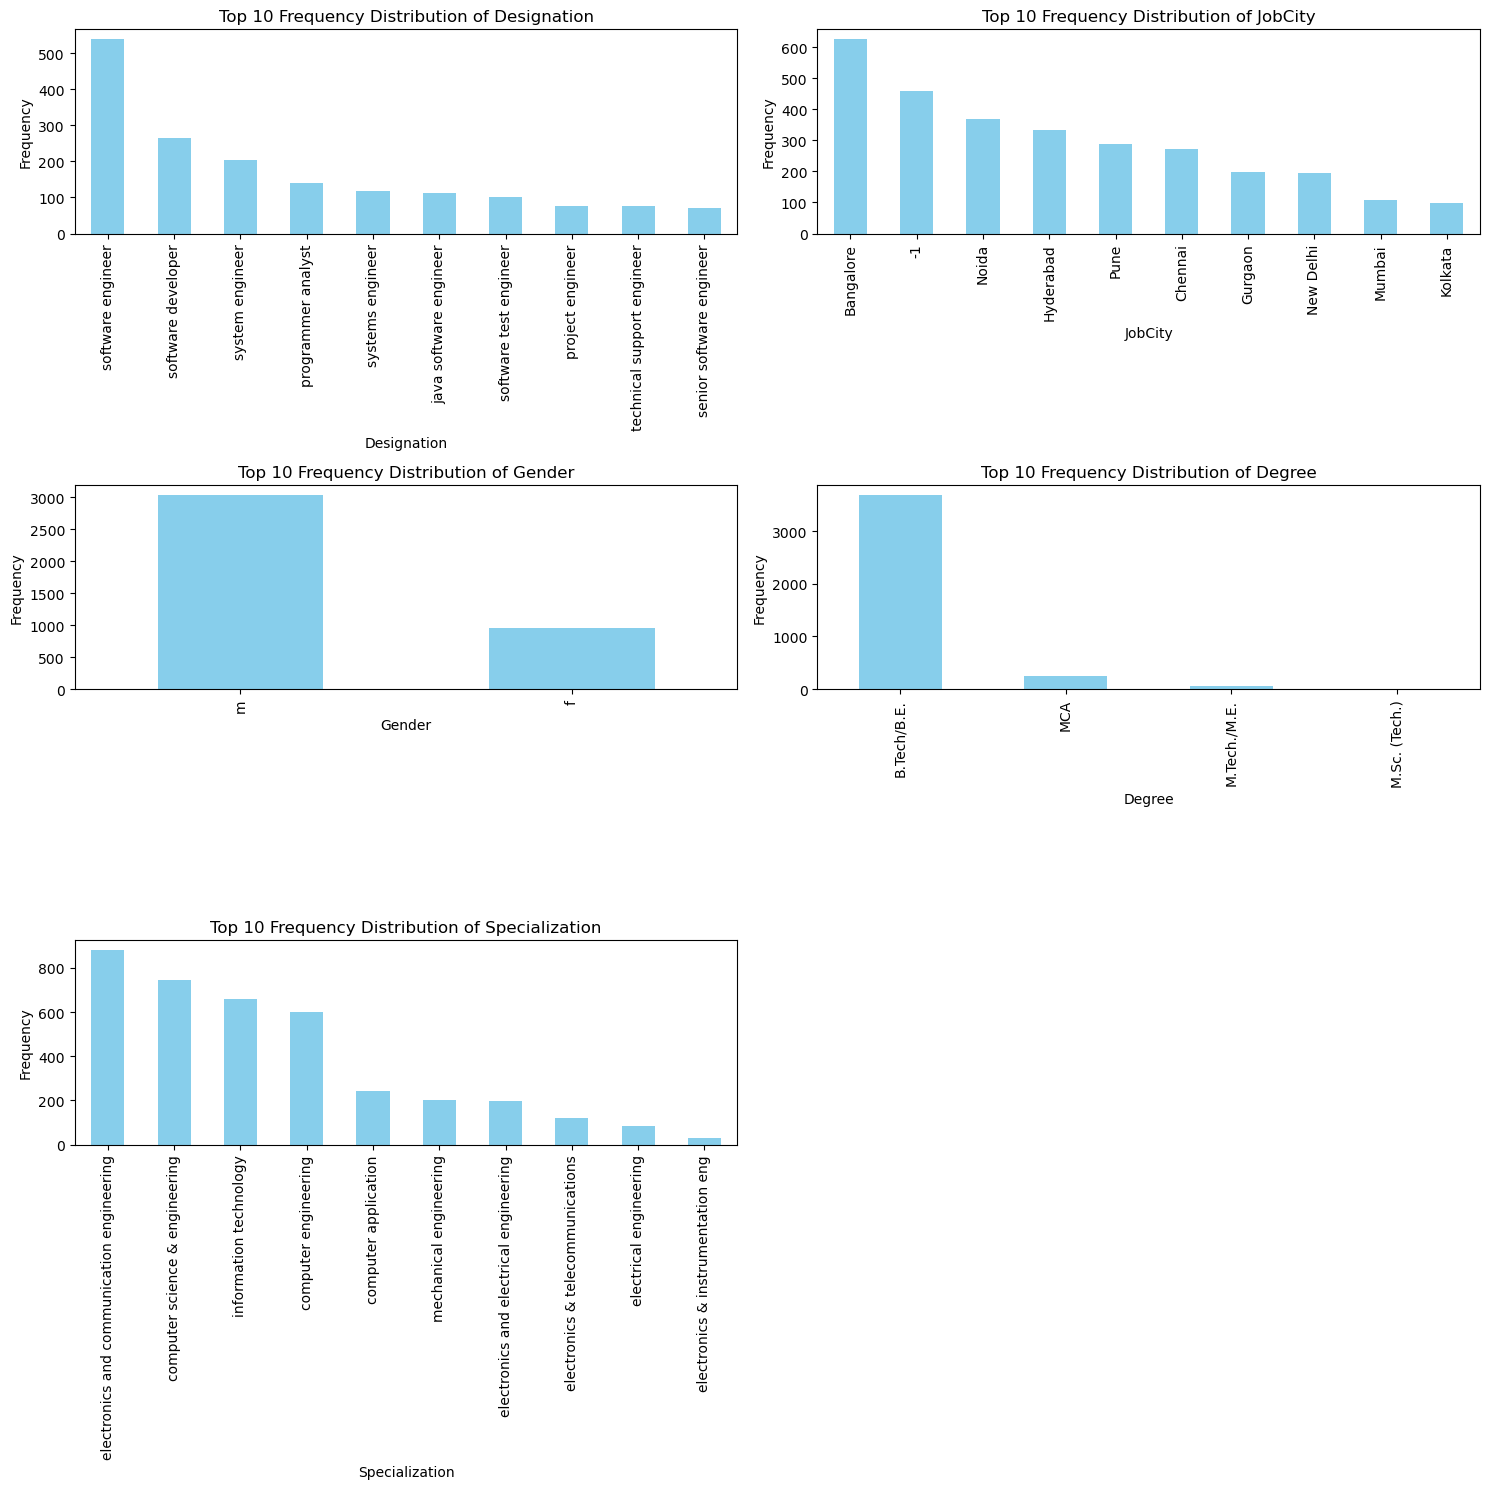

In [44]:
cate_col = [ 'Designation', 'JobCity', 'Gender', 'Degree', 'Specialization']

plt.figure(figsize=(15, 15))
for i, column in enumerate(cate_col, 1):
    plt.subplot(3, 2, i)
    df[column].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title(f'Top 10 Frequency Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Bivariate Analysis

#### Numerical Vs Numerical Column

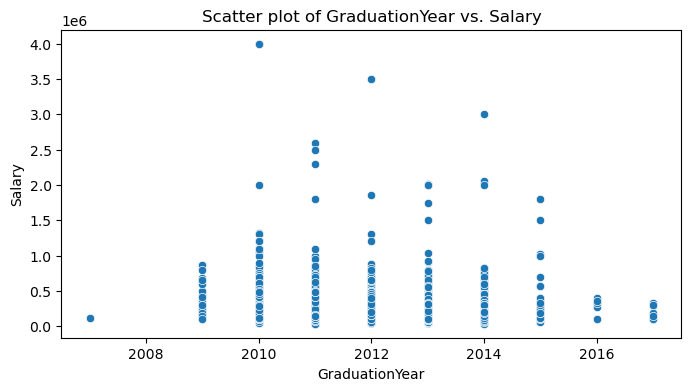

In [49]:
# Graduation Year Vs Salary

df_fil = df[(df['GraduationYear'] >= 2000) & (df['GraduationYear'] <= 2023)]

plt.figure(figsize=(8, 4))
sns.scatterplot(x='GraduationYear', y='Salary', data = df_fil)
plt.title('Scatter plot of GraduationYear vs. Salary')
plt.xlabel('GraduationYear')
plt.ylabel('Salary')
plt.show()

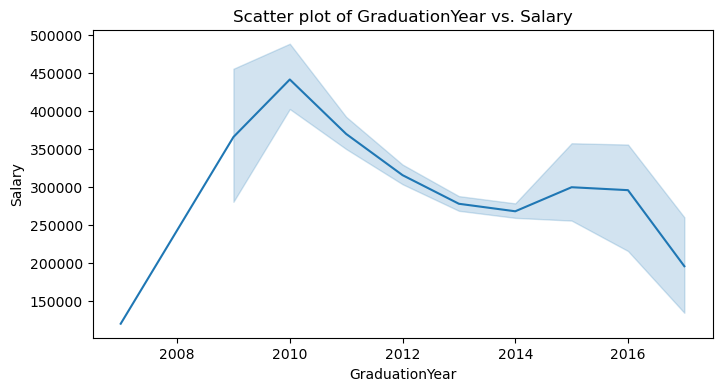

In [48]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='GraduationYear', y='Salary', data = df_fil)
plt.title('Scatter plot of GraduationYear vs. Salary')
plt.xlabel('GraduationYear')
plt.ylabel('Salary')
plt.show()

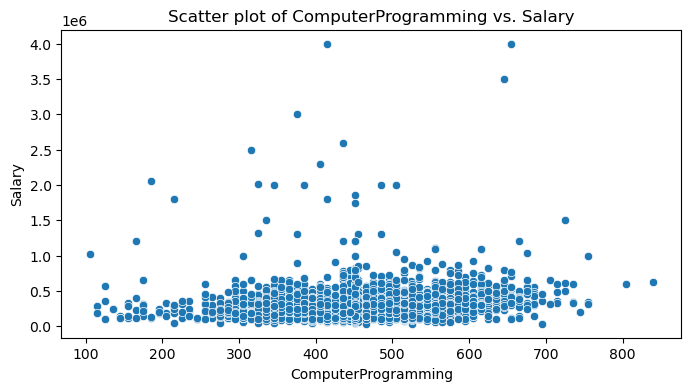

In [50]:
# Computer Programming Vs Salary
plt.figure(figsize=(8, 4))
sns.scatterplot(x='ComputerProgramming', y='Salary', data = df)
plt.title('Scatter plot of ComputerProgramming vs. Salary')
plt.xlabel('ComputerProgramming')
plt.ylabel('Salary')
plt.show()

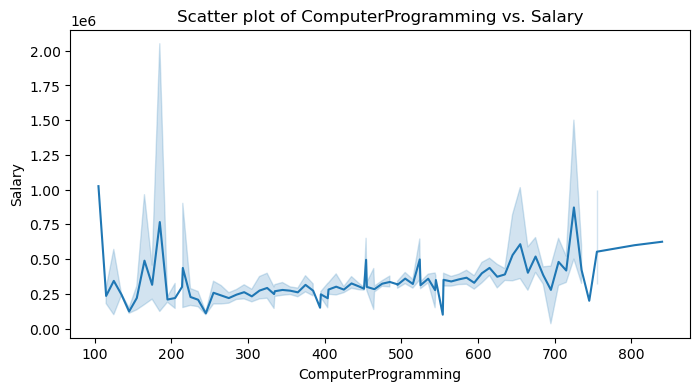

In [51]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='ComputerProgramming', y='Salary', data=df)
plt.title('Scatter plot of ComputerProgramming vs. Salary')
plt.xlabel('ComputerProgramming')
plt.ylabel('Salary')
plt.show()

## Categorical Column Vs Numerical Column

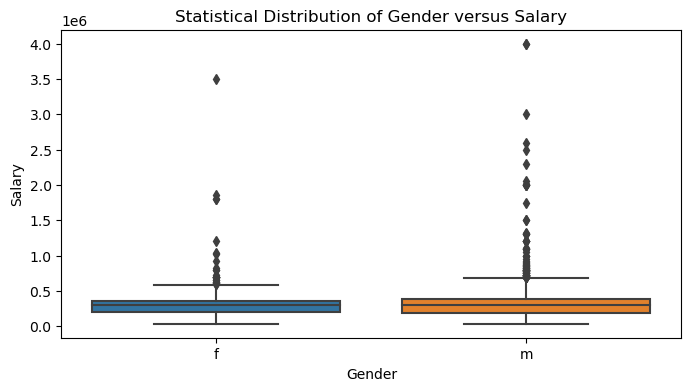

In [53]:
# Gender Vs Salary
plt.figure(figsize=(8,4))
sns.boxplot( x=df['Gender'], y=df['Salary'] )

plt.title('Statistical Distribution of Gender versus Salary')
plt.show()

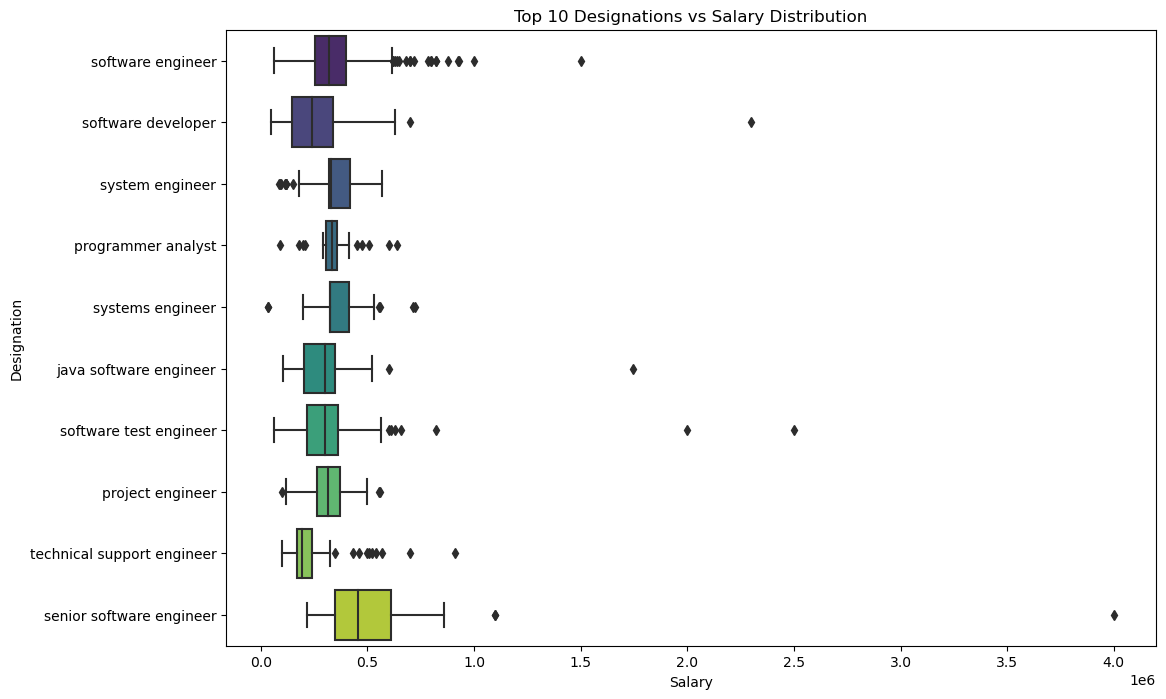

In [58]:
# Designations vs Salary

top_10 = df['Designation'].value_counts().index[:10]

df_top_10 = df[df['Designation'].isin(top_10)]

plt.figure(figsize=(12, 8))
sns.boxplot(x ='Salary', y ='Designation', data = df_top_10, order = top_10, palette='viridis')
plt.title('Top 10 Designations vs Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Designation')
plt.show()

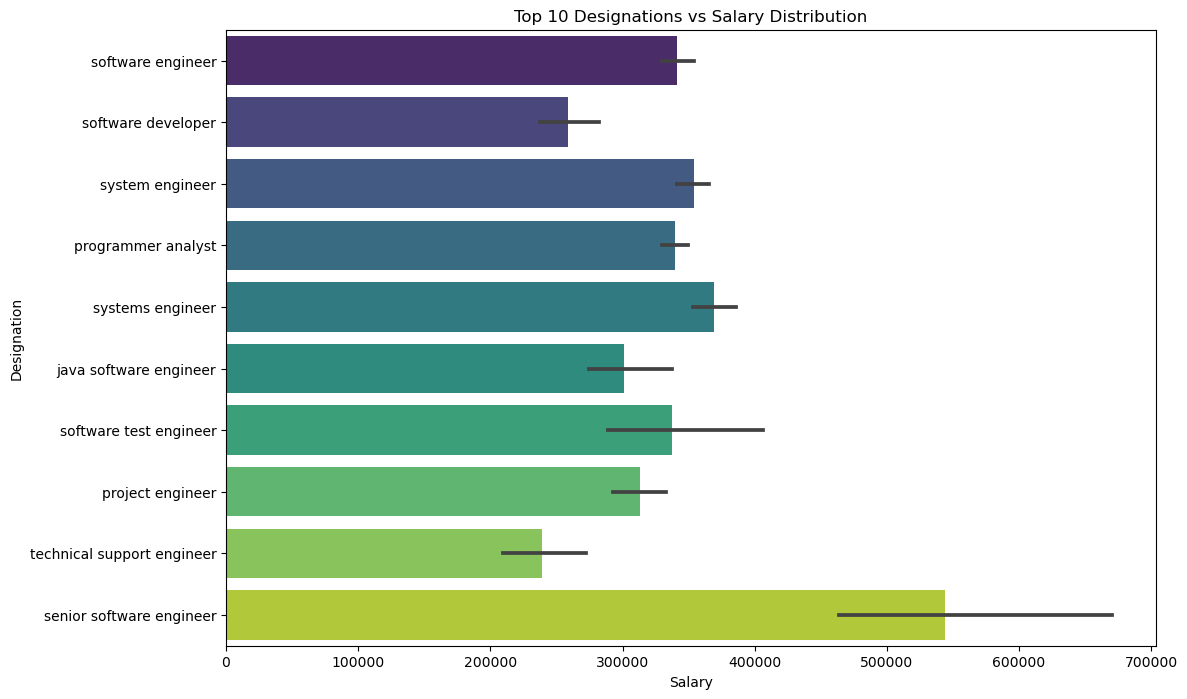

In [59]:
plt.figure(figsize=(12, 8))
sns.barplot(x ='Salary', y ='Designation', data = df_top_10, order = top_10, palette ='viridis')
plt.title('Top 10 Designations vs Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Designation')
plt.show()

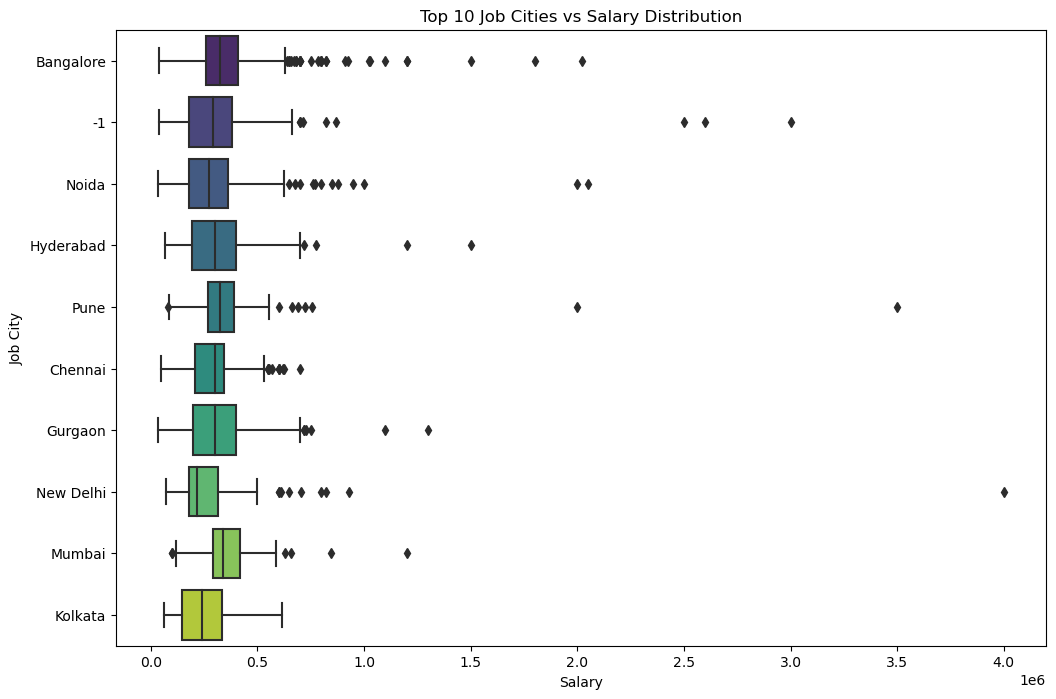

In [60]:
# Job City Vs Salary
plt.figure(figsize=(12, 8))
sns.boxplot(x ='Salary', y ='JobCity', data = df, order = df['JobCity'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Job Cities vs Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Job City')
plt.show()

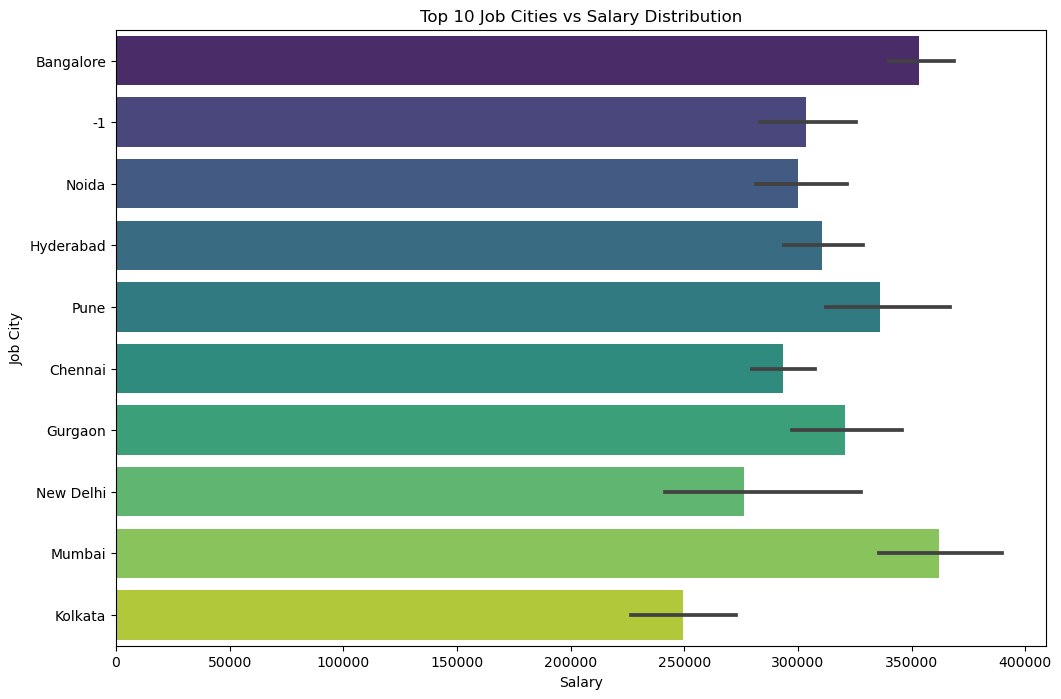

In [61]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Salary', y = 'JobCity', data = df, order = df['JobCity'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Job Cities vs Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Job City')
plt.show()

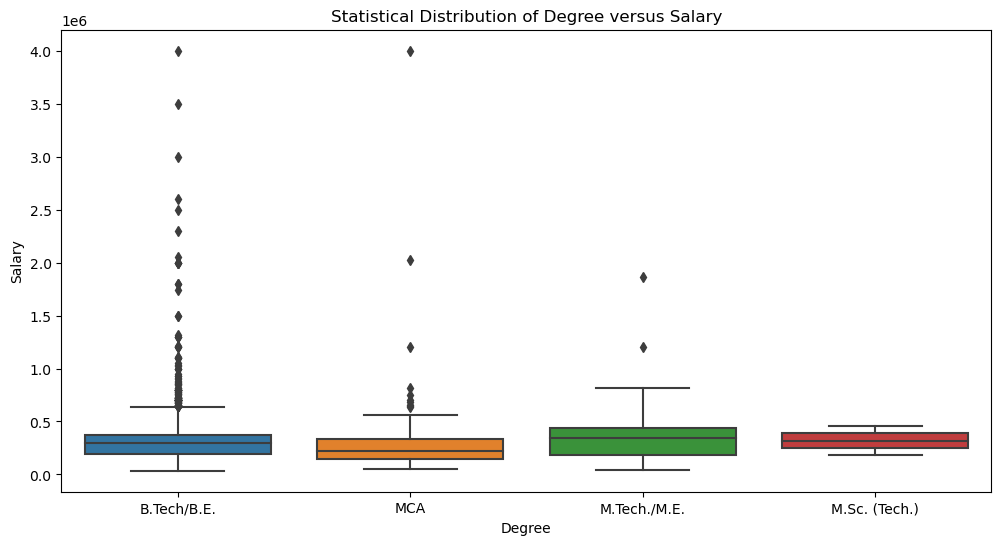

In [62]:
# Degree Vs Salary
plt.figure(figsize=(12,6))
sns.boxplot( x=df['Degree'], y=df['Salary'] )

plt.title('Statistical Distribution of Degree versus Salary')
plt.show()

## Categorical Vs Categorical Columns

<Axes: xlabel='Gender,Specialization'>

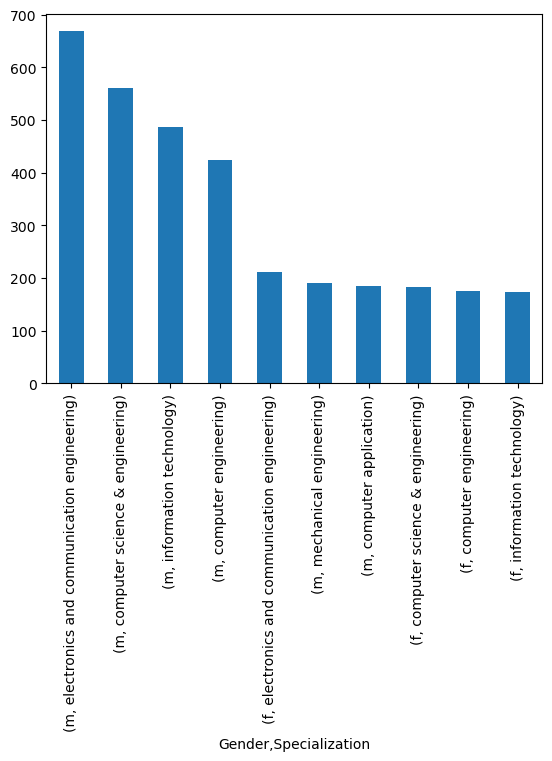

In [64]:
# Gender Vs Specialization
df.groupby("Gender")['Specialization'].value_counts().nlargest(10).plot(kind = "bar")

##  Research Questions

In [65]:
# Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering
# if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate 
# Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” 
# Test this claim with the data given to you.

In [71]:
rel_job = ["programmer analyst","software engineer", "hardware engineer" , "associate engineer"]
df2 = df[(df["Degree"]=="B.Tech/B.E.") & (df["Specialization"] == "computer science & engineering") \
         & (df["Designation"].isin(rel_job))]

In [72]:
df2.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,12percentage,CollegeTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
24,335000.0,NaT,6/1/15 0:00,programmer analyst,Hyderabad,m,NaT,88.0,90.0,2,...,346.000000,406.876596,433.037267,350.173797,349.666667,0.4155,0.8027,0.1357,-0.99500,-0.6692
31,340000.0,NaT,4/1/15 0:00,software engineer,Bangalore,m,NaT,77.2,86.1,2,...,407.000000,406.876596,433.037267,350.173797,349.666667,-0.0154,1.2114,1.0859,-1.50210,0.2889
48,390000.0,NaT,present,software engineer,Bangalore,m,NaT,86.6,75.0,2,...,346.000000,406.876596,433.037267,350.173797,349.666667,-2.5039,0.0328,0.3817,0.26793,0.5024
52,400000.0,NaT,present,software engineer,Navi Mumbai,m,NaT,85.2,81.5,2,...,405.636364,406.876596,433.037267,350.173797,349.666667,1.1336,0.3789,1.0859,0.65300,0.2889
55,250000.0,NaT,present,software engineer,Mangalore,m,NaT,90.8,90.1,2,...,376.000000,406.876596,433.037267,350.173797,349.666667,-0.3027,0.7119,-0.2974,1.16010,-0.4776


Text(0.5, 1.0, 'Boxplot of Salary vs Designation')

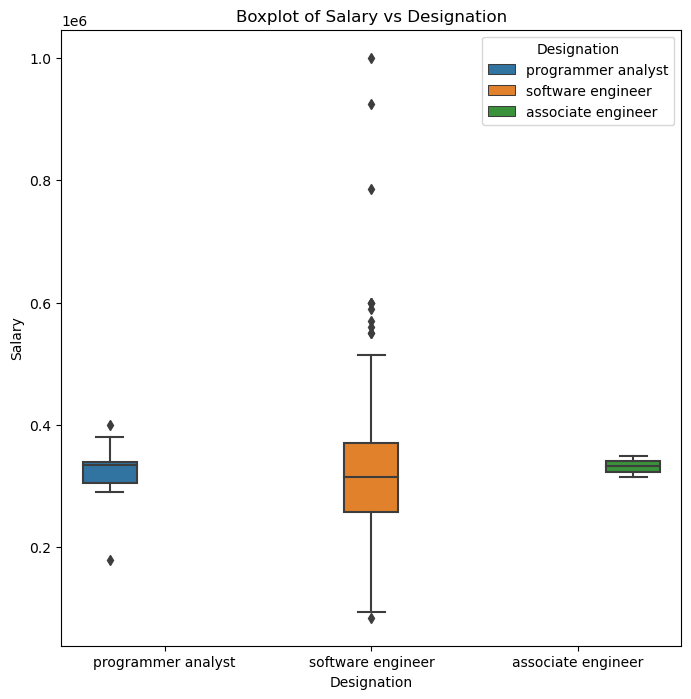

In [76]:
plt.figure(figsize = (8,8))
sns.boxplot(data = df2 , x = "Designation",y = "Salary",hue = "Designation")
plt.title("Boxplot of Salary vs Designation")